In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
# num_words=10000 keeps the top 10,000 most frequent words in the training data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Display the shape of training and testing data
print(f"Training entries: {len(X_train)}, labels: {len(y_train)}")
print(f"Test entries: {len(X_test)}, labels: {len(X_test)}")

Training entries: 25000, labels: 25000
Test entries: 25000, labels: 25000


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a maximum length for reviews (e.g., 200 words)
maxlen = 200

# Pad sequences so that they all have the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Check the shape after padding
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (25000, 200)
Shape of X_test: (25000, 200)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))

# Add an LSTM layer
model.add(LSTM(units=128, return_sequences=False))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a Dense layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 522ms/step - accuracy: 0.6819 - loss: 0.5674 - val_accuracy: 0.8612 - val_loss: 0.3435
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 163s 521ms/step - accuracy: 0.8958 - loss: 0.2745 - val_accuracy: 0.8596 - val_loss: 0.3454
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 161s 515ms/step - accuracy: 0.9282 - loss: 0.1936 - val_accuracy: 0.8694 - val_loss: 0.3614
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 197s 498ms/step - accuracy: 0.9461 - loss: 0.1521 - val_accuracy: 0.8406 - val_loss: 0.3887
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 163s 520ms/step - accuracy: 0.9639 - loss: 0.1091 - val_accuracy: 0.8378 - val_loss: 0.4453


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.8395 - loss: 0.4555
Test Accuracy: 0.8409
Test Loss: 0.4442


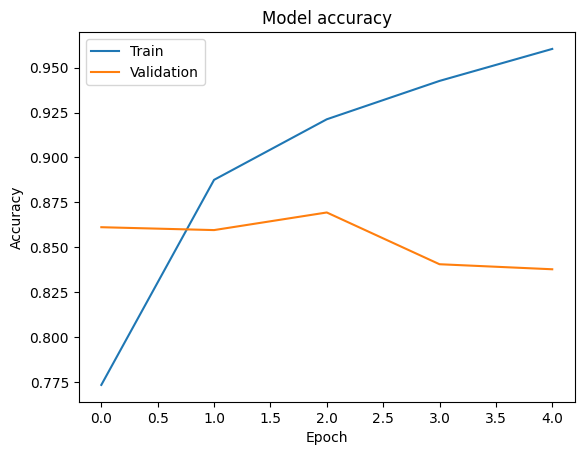

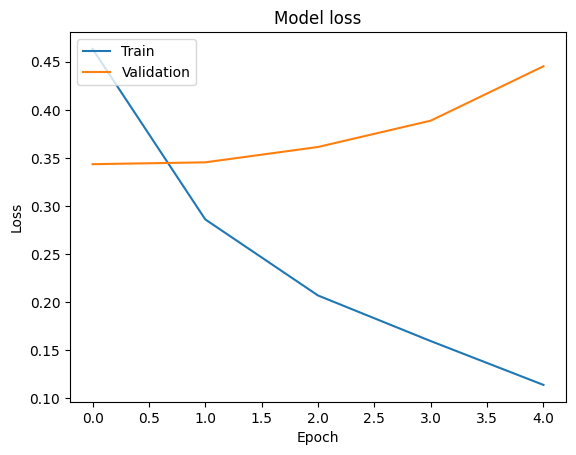

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
